In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [72]:
from encodings import CodecRegistryError


df = pd.read_csv('data_final.csv')
tl = pd.read_csv('ketidaklengkapan.csv')

# convert date to datetime
df['date'] = pd.to_datetime(df['date'],errors='coerce')
tl['date'] = pd.to_datetime(tl['date'],errors='coerce')

# create month column
df['month'] = df['date'].dt.strftime('%b')
tl['month'] = tl['date'].dt.strftime('%b')

# create percentage column
tl['percentage'] = (tl.pr) / (tl.pasien) * 100
pd.set_option('display.precision', 1)


In [73]:
df

,date,no_rm,dokter,form,month
0,2022-08-01,127094.0,dr. Airin Angelina. Sp. S,DPJP,Aug
1,2022-08-01,127094.0,dr. Guritno Adistyawan. Sp. KFR,Jawaban Konsultasi,Aug
2,2022-08-01,261060.0,dr. Tri Joko Winarno. Sp. OG.,DPJP,Aug
3,2022-08-01,261060.0,dr. Bangsal,CPPT,Aug
4,2022-08-01,261032.0,dr. Airin Angelina. Sp. S,Jawaban Rujukan,Aug
...,...,...,...,...,...
10263,2022-06-13,189300.0,dr. Dian Caesarianna. Sp. B,Checklist Keselamatan Op,Jun
10264,2022-06-30,168864.0,dr. Taufiq Nugroho. Sp. B.,Permintaan Konsultasi,Jun
10265,2022-08-21,135969.0,dr. Diannisa Ikarumi Enisar Sangun. Sp.OG,Askep Ranap,Aug
10266,2022-05-07,47186.0,dr. Muhammad Abdurrahman. Sp. B,Permintaan Konsultasi,May


In [74]:
tl

,date,pr,pasien,month,percentage
0,2022-01-31,388,669,Jan,58.0
1,2022-02-28,266,493,Feb,54.0
2,2022-03-31,325,514,Mar,63.2
3,2022-04-30,307,574,Apr,53.5
4,2022-05-31,355,594,May,59.8
5,2022-06-30,401,674,Jun,59.5
6,2022-07-31,498,739,Jul,67.4
7,2022-08-31,559,851,Aug,65.7


In [75]:
form = df.groupby('form')['no_rm'].count()
dokter = df.groupby('dokter')['no_rm'].count()

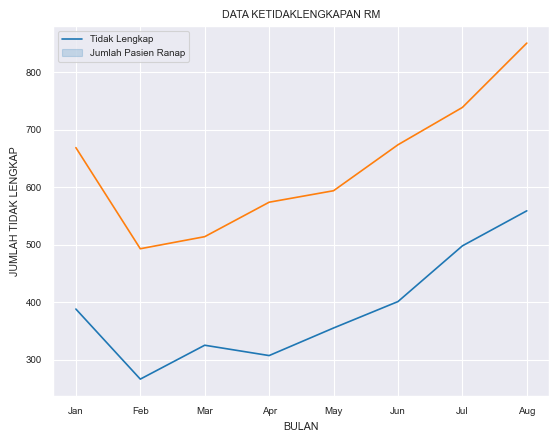

In [76]:
fig, ax = plt.subplots()
ax = sns.lineplot(x='month', y= 'pr', data = tl)
ax = sns.lineplot(x='month', y= 'pasien', data = tl)

plt.xlabel('BULAN')
plt.ylabel('JUMLAH TIDAK LENGKAP')
plt.title('DATA KETIDAKLENGKAPAN RM')
plt.legend(('Tidak Lengkap', 'Jumlah Pasien Ranap'))
fig.savefig('pr.png')



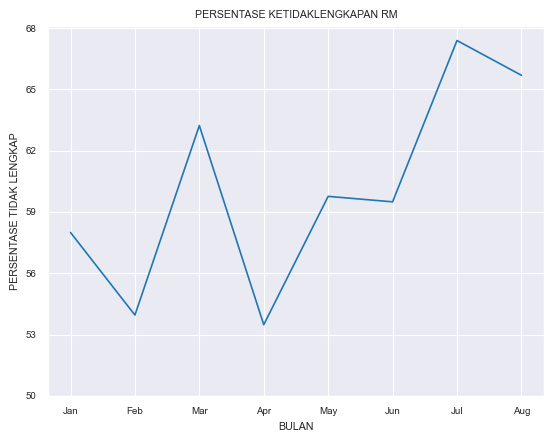

In [77]:
fig, ax = plt.subplots()

ax = sns.lineplot(x='month', y= 'percentage', data = tl)

plt.xlabel('BULAN')
plt.ylabel('PERSENTASE TIDAK LENGKAP')
plt.title('PERSENTASE KETIDAKLENGKAPAN RM')
plt.yticks(np.arange(50,70,3))
plt.show()

fig.savefig('persen.png')

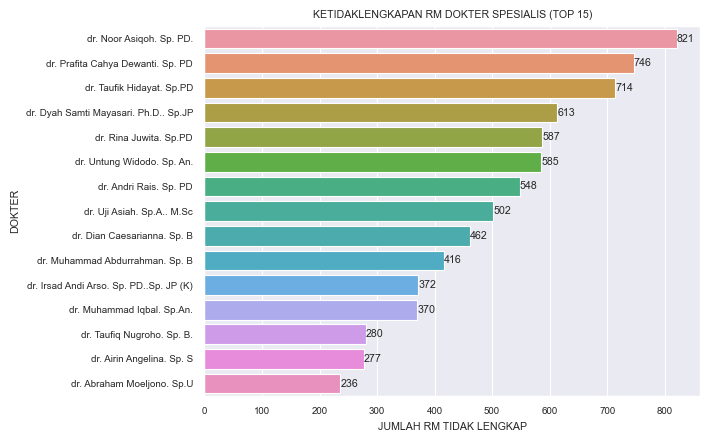

In [78]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=0.8)

ax = sns.countplot(y = 'dokter', data = df, order = df.dokter.value_counts().index[:15])

plt.xlabel('JUMLAH RM TIDAK LENGKAP')
plt.ylabel('DOKTER')
plt.title('KETIDAKLENGKAPAN RM DOKTER SPESIALIS (TOP 15)')
ax.bar_label(ax.containers[0])
plt.show()
fig.savefig('dokter.png')


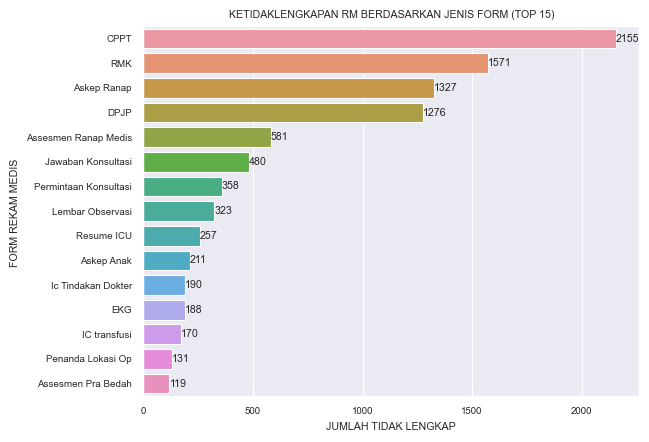

In [79]:
fig, ax = plt.subplots()

sns.set_style('darkgrid')
sns.set_context('paper', font_scale=0.8)

ax = sns.countplot(y = 'form', data = df, order = df.form.value_counts().index[:15])

plt.xlabel('JUMLAH TIDAK LENGKAP')
plt.ylabel('FORM REKAM MEDIS ')
plt.title('KETIDAKLENGKAPAN RM BERDASARKAN JENIS FORM (TOP 15)')
ax.bar_label(ax.containers[0])
plt.show()

fig.savefig('form.png')